# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
from classes.embeddings_model import Trainer
import time
import csv
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
sns.set_theme()


# data for xite

In [2]:
all_subjects_xite = ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008',
                'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016',
                'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024',
                'S025', 'S026', 'S027', 'S029', 'S031', 'S032', 'S033', 'S034',
                'S035', 'S036', 'S037', 'S038', 'S039', 'S040', 'S041', 'S042',
                'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050',
                'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058',
                'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066', 'S067',
                'S068', 'S069', 'S070', 'S071', 'S072', 'S073', 'S074', 'S075',
                'S076', 'S077', 'S078', 'S079', 'S080', 'S081', 'S082', 'S083',
                'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S090', 'S091',
                'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099',
                'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107',
                'S109', 'S110', 'S111', 'S112', 'S113', 'S114', 'S115', 'S116',
                'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S123', 'S124',
                'S125', 'S126', 'S127', 'S128', 'S129', 'S130', 'S131', 'S132',
                'S133', 'S134']

In [3]:
path = "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl"
filter = lambda data: (data["label"] == 3) + (data["label"] == 6)

# data for intense

In [4]:
intense_path = "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\INTENSE\\normalized_subjects.pkl"
data = pd.read_pickle(intense_path)
all_subjects_intense = data["subject"].unique()

# training loop

In [4]:
filename_saving = 'D:\Workspace\workspace_masterarbeit\Results\FeatureClassificationTesting\intense.csv'

In [6]:
for i in tqdm(range(len(all_subjects_xite))):
    subjects_valid = [all_subjects_xite[i]]
    subjects_train = [sub for sub in all_subjects_xite if sub not in subjects_valid]
    
    trainer = Trainer(subjects_train, subjects_valid, path=path)
    
    trainer.train(15)
    start = time.time()
    acc_no_embedding = trainer.calculate_valid_acc(use_embeddings=False)
    end = time.time()
    t_no_embedding = end-start
    start = time.time()
    acc_with_embedding = trainer.calculate_valid_acc(use_embeddings=True)
    end = time.time()
    t_with_embedding = end-start

    
    data = [subjects_valid[0], acc_no_embedding*100, t_no_embedding, acc_with_embedding*100, t_with_embedding]
    with open(filename_saving, 'a', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data)

100%|██████████| 24/24 [05:16<00:00, 13.18s/it]


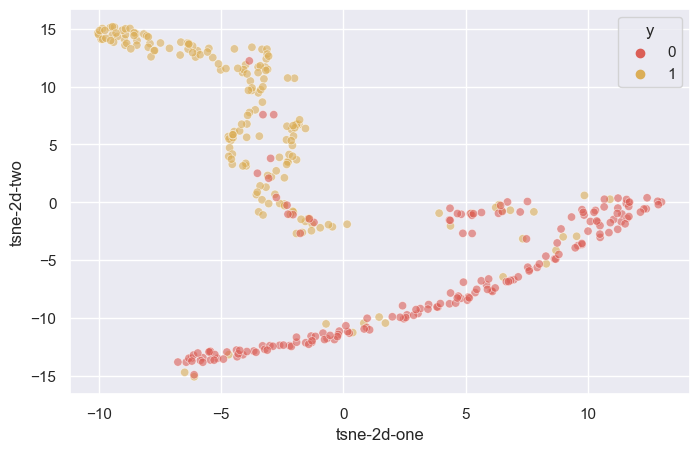

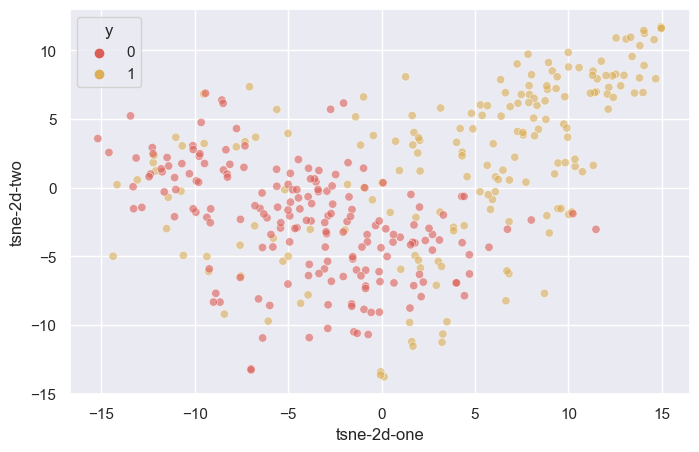

In [5]:
subjects_valid = [all_subjects_xite[0]]
subjects_train = [sub for sub in all_subjects_xite if sub not in subjects_valid]
trainer = Trainer(subjects_train, subjects_valid, path=path)

trainer.train(10)

trainer.display_embeddings(True)
trainer.display_embeddings(False)